In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.set_option('display.width', 500)
pd.set_option('display.max_columns',100)

In [29]:
def remove_border(axes=None, top=False,right=True,left=True, bottom=False):
    ax=axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    ax.yaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [5]:
!head imdb_top_1000.txt

'head' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
names = ['imdbID','title','year','score','votes','runtime','genres']
data = pd.read_csv('imdb_top_10000.txt', delimiter='\t', names=names).dropna()
"Number of rows: %i" % data.shape[0]

'Number of rows: 9999'

In [9]:
data.head()

imdbID                            title  year  score   votes    runtime                            genres
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.                       Crime|Drama
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.                    Crime|Thriller
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.            Drama|Mystery|Thriller
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.           Action|Adventure|Sci-Fi
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.  Action|Adventure|Sci-Fi|Thriller

In [10]:
dirty = '142 min.s'
number, text = dirty.split(' ')
clean = int(number)
number

'142'

In [12]:
clean_runtime = [float(r.split(' ')[0]) for r in data.runtime]
data['runtime'] = clean_runtime
data.head()

imdbID                            title  year  score   votes  runtime                            genres
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479    142.0                       Crime|Drama
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065    154.0                    Crime|Thriller
2  tt0137523                Fight Club (1999)  1999    8.8  458173    139.0            Drama|Mystery|Thriller
3  tt0133093                The Matrix (1999)  1999    8.7  448114    136.0           Action|Adventure|Sci-Fi
4  tt1375666                 Inception (2010)  2010    8.9  385149    148.0  Action|Adventure|Sci-Fi|Thriller

In [15]:
genres = set()
for m in data.genres:
    genres.update(g for g in m.split('|'))
genres = sorted(genres)

for genre in genres:
    data[genre] = [genre in movie.split('|') for movie in data.genres]

data.head()

imdbID                            title  year  score   votes  runtime                            genres  Action  Adult  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  Fantasy  Film-Noir  History  Horror  Music  Musical  Mystery   News  Reality-TV  Romance  Sci-Fi  Sport  Thriller    War  Western
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479    142.0                       Crime|Drama   False  False      False      False      False   False   True   True   False    False      False    False   False  False    False    False  False       False    False   False  False     False  False    False
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065    154.0                    Crime|Thriller   False  False      False      False      False   False   True  False   False    False      False    False   False  False    False    False  False       False    False   False  False      True  False    False
2  tt0137523                Fight Club (1999)  1999    8.8  458173    139.0            Drama|Mystery|Thriller   False  False      False      False      False   False  False   True   False    False      False    False   False  False    False     True  False       False    False   False  False      True  False    False
3  tt0133093                The Matrix (1999)  1999    8.7  448114    136.0           Action|Adventure|Sci-Fi    True  False       True      False      False   False  False  False   False    False      False    False   False  False    False    False  False       False    False    True  False     False  False    False
4  tt1375666                 Inception (2010)  2010    8.9  385149    148.0  Action|Adventure|Sci-Fi|Thriller    True  False       True      False      False   False  False  False   False    False      False    False   False  False    False    False  False       False    False    True  False      True  False    False

In [16]:
data["title"] = [t[0:-7] for t in data.title]
data.head()

imdbID                     title  year  score   votes  runtime                            genres  Action  Adult  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  Fantasy  Film-Noir  History  Horror  Music  Musical  Mystery   News  Reality-TV  Romance  Sci-Fi  Sport  Thriller    War  Western
0  tt0111161  The Shawshank Redemption  1994    9.2  619479    142.0                       Crime|Drama   False  False      False      False      False   False   True   True   False    False      False    False   False  False    False    False  False       False    False   False  False     False  False    False
1  tt0110912              Pulp Fiction  1994    9.0  490065    154.0                    Crime|Thriller   False  False      False      False      False   False   True  False   False    False      False    False   False  False    False    False  False       False    False   False  False      True  False    False
2  tt0137523                Fight Club  1999    8.8  458173    139.0            Drama|Mystery|Thriller   False  False      False      False      False   False  False   True   False    False      False    False   False  False    False     True  False       False    False   False  False      True  False    False
3  tt0133093                The Matrix  1999    8.7  448114    136.0           Action|Adventure|Sci-Fi    True  False       True      False      False   False  False  False   False    False      False    False   False  False    False    False  False       False    False    True  False     False  False    False
4  tt1375666                 Inception  2010    8.9  385149    148.0  Action|Adventure|Sci-Fi|Thriller    True  False       True      False      False   False  False  False   False    False      False    False   False  False    False    False  False       False    False    True  False      True  False    False

In [17]:
data[['score','runtime','year','votes']].describe()

score      runtime         year          votes
count  9999.000000  9999.000000  9999.000000    9999.000000
mean      6.385989   103.580358  1993.471447   16605.462946
std       1.189965    26.629310    14.830049   34564.883945
min       1.500000     0.000000  1950.000000    1356.000000
25%       5.700000    93.000000  1986.000000    2334.500000
50%       6.600000   102.000000  1998.000000    4981.000000
75%       7.200000   115.000000  2005.000000   15278.500000
max       9.200000   450.000000  2011.000000  619479.000000

In [18]:
len(data[data.runtime == 0])

282

In [22]:
data.runtime[data.runtime==0] = np.nan

C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
data.runtime.describe()

count    9717.000000
mean      106.586395
std        20.230330
min        45.000000
25%        93.000000
50%       103.000000
75%       115.000000
max       450.000000
Name: runtime, dtype: float64

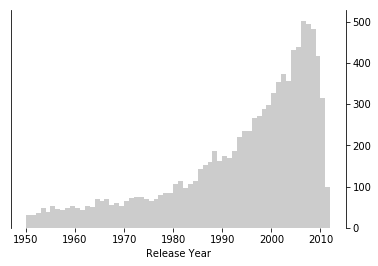

In [30]:
plt.hist(data.year, bins=np.arange(1950, 2013), color='#cccccc')
plt.xlabel("Release Year")
remove_border()

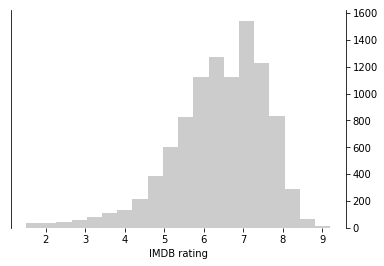

In [31]:
plt.hist(data.score,bins=20,color="#cccccc")
plt.xlabel("IMDB rating")
remove_border()

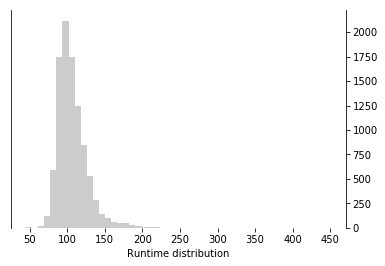

In [33]:
plt.hist(data.runtime.dropna(), bins=50, color='#cccccc')
plt.xlabel("Runtime distribution")
remove_border()

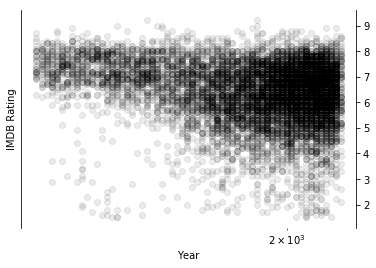

In [34]:
plt.scatter(data.year, data.score, alpha=0.08, color='k')
plt.xlabel("Year")
plt.ylabel("IMDB Rating")
plt.xscale('log')
remove_border()

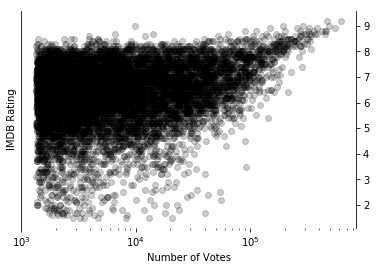

In [35]:
plt.scatter(data.votes,data.score,alpha=.2,color="k")
plt.xlabel("Number of Votes")
plt.ylabel("IMDB Rating")
plt.xscale('log')
remove_border()

In [36]:
data[(data.votes > 9e4) & (data.score < 5)][['title','year','score','votes','genres']]

title  year  score  votes                           genres
317        New Moon  2009    4.5  90457  Adventure|Drama|Fantasy|Romance
334  Batman & Robin  1997    3.5  91875      Action|Crime|Fantasy|Sci-Fi

In [37]:
data[data.score == data.score.min()][['title','year','score','votes','genres']]

title  year  score  votes                              genres
1982      Manos: The Hands of Fate  1966    1.5  20927                              Horror
2793  Superbabies: Baby Geniuses 2  2004    1.5  13196                       Comedy|Family
3746             Daniel the Wizard  2004    1.5   8271  Comedy|Crime|Family|Fantasy|Horror
5158                  Ben & Arthur  2002    1.5   4675                       Drama|Romance
5993     Night Train to Mundo Fine  1966    1.5   3542          Action|Adventure|Crime|War
6257               Monster a-Go Go  1965    1.5   3255                       Sci-Fi|Horror
6726                    Dream Well  2009    1.5   2848                Comedy|Romance|Sport

In [38]:
data[data.score == data.score.max()][['title','year','score','votes','genres']]

title  year  score   votes       genres
0   The Shawshank Redemption  1994    9.2  619479  Crime|Drama
26             The Godfather  1972    9.2  474189  Crime|Drama

In [39]:
genre_count=np.sort(data[genres].sum())[::-1]
pd.DataFrame({'Genre Count':genre_count})

Genre Count
0          5697
1          3922
2          2832
3          2441
4          1891
5          1867
6          1313
7          1215
8          1009
9           916
10          897
11          754
12          512
13          394
14          371
15          358
16          314
17          288
18          260
19          235
20           40
21            9
22            1
23            1

In [40]:
genre_count=data[genres].sum(axis=1)
print("Average movie has %0.2f genres" % genre_count.mean())
genre_count.describe()

Average movie has 2.75 genres


count    9999.000000
mean        2.753975
std         1.168910
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
dtype: float64

In [49]:
decade =  (data.year // 10) * 10
tyd = data[['title', 'year']]
tyd['decade'] = decade

tyd.head()

C:\Users\santacrw\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


title  year  decade
0  The Shawshank Redemption  1994    1990
1              Pulp Fiction  1994    1990
2                Fight Club  1999    1990
3                The Matrix  1999    1990
4                 Inception  2010    2010

year
1950    7.244522
1960    7.062367
1970    6.842297
1980    6.248693
1990    6.199316
2000    6.277858
2010    6.344552
Name: Decade Mean, dtype: float64


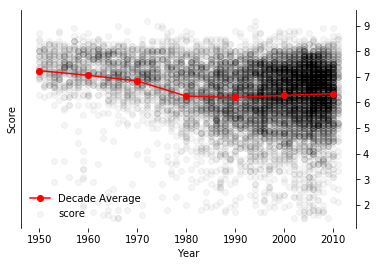

In [55]:
decade_mean=data.groupby(decade).score.mean()
decade_mean.name='Decade Mean'
print(decade_mean)
plt.plot(decade_mean.index,decade_mean.values,'o-',color='r',label='Decade Average')
plt.scatter(data.year,data.score,alpha=.04,color='k')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)
remove_border()

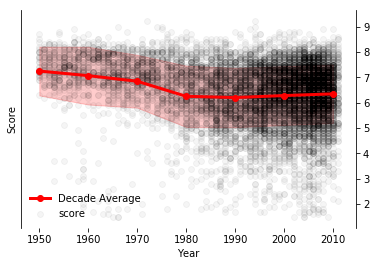

In [59]:
grouped_scores=data.groupby(decade).score
mean=grouped_scores.mean()
std=grouped_scores.std()
plt.plot(decade_mean.index, decade_mean.values,'o-',color='r',lw=3,label='Decade Average')
plt.fill_between(decade_mean.index,(decade_mean + std).values,(decade_mean - std).values,color='r',alpha=.2)
plt.scatter(data.year,data.score,alpha=.04,color='k')
plt.xlabel("Year")
plt.ylabel("Score")
plt.legend(frameon=False)
remove_border()

In [60]:
for year,subset in data.groupby('year'):
    print(year,subset[subset.score==subset.score.max()].title.values)

1950 ['Sunset Blvd.']
1951 ['Strangers on a Train']
1952 ["Singin' in the Rain"]
1953 ['The Wages of Fear' 'Tokyo Story']
1954 ['Seven Samurai']
1955 ['Diabolique']
1956 ['The Killing']
1957 ['12 Angry Men']
1958 ['Vertigo']
1959 ['North by Northwest']
1960 ['Psycho']
1961 ['Yojimbo']
1962 ['To Kill a Mockingbird' 'Lawrence of Arabia']
1963 ['The Great Escape' 'High and Low']
1964 ['Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb']
1965 ['For a Few Dollars More']
1966 ['The Good, the Bad and the Ugly']
1967 ['Cool Hand Luke']
1968 ['Once Upon a Time in the West']
1969 ['Butch Cassidy and the Sundance Kid' 'Army of Shadows']
1970 ['Patton' 'The Conformist' 'Le Cercle Rouge']
1971 ['A Clockwork Orange']
1972 ['The Godfather']
1973 ['The Sting' 'Scenes from a Marriage']
1974 ['The Godfather: Part II']
1975 ['Outrageous Class']
1976 ['Tosun Pasa']
1977 ['Star Wars: Episode IV - A New Hope']
1978 ['The Girl with the Red Scarf']
1979 ['Apocalypse Now']
1980 ['Star Wars: 